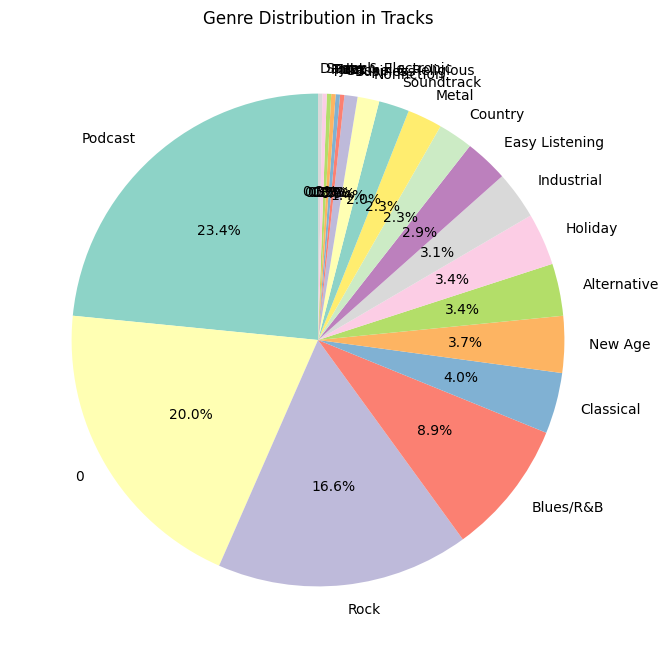

C:\Users\rites\AppData\Local\Temp\ipykernel_10404\3629202410.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Set3")


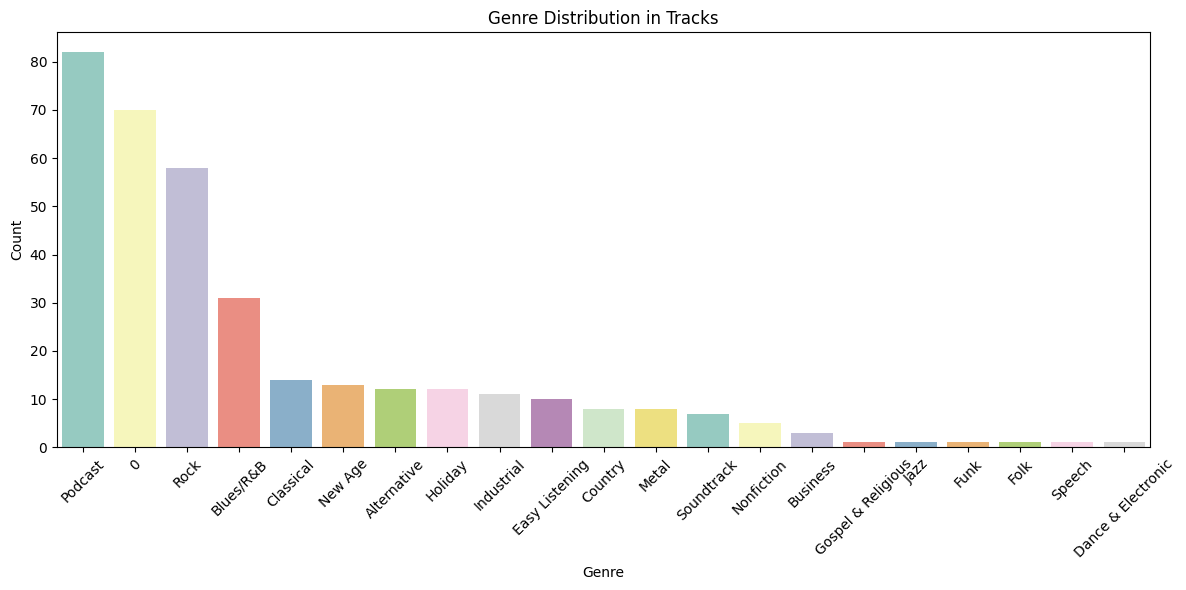

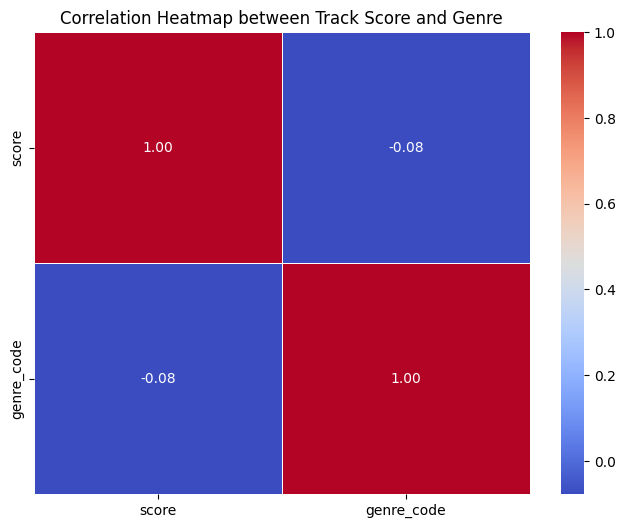

C:\Users\rites\AppData\Local\Temp\ipykernel_10404\3629202410.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='track_name', data=recommended_tracks, palette='coolwarm')


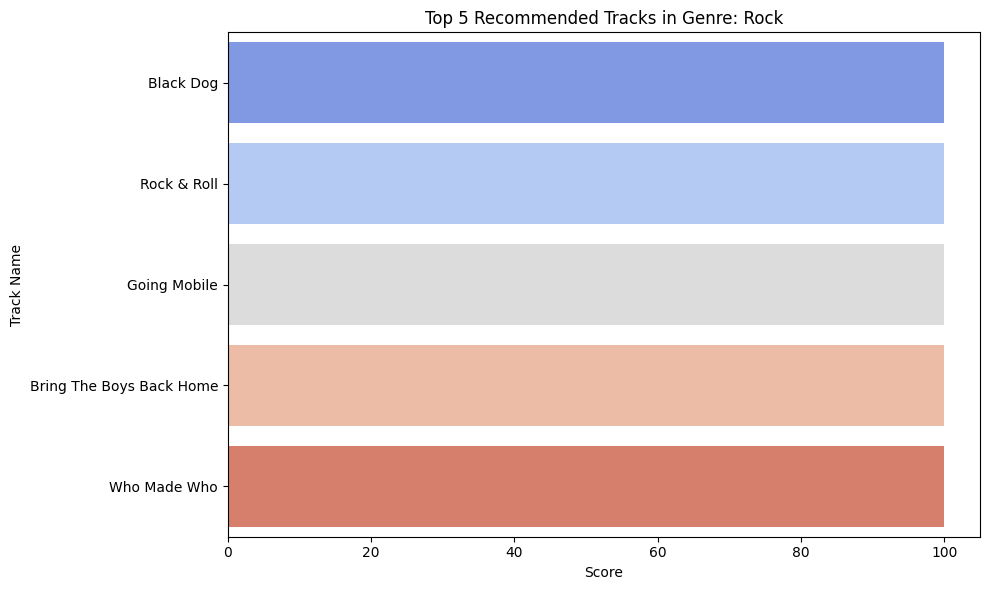

C:\Users\rites\AppData\Local\Temp\ipykernel_10404\3629202410.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='album', y='genre', data=recommended_albums, palette='Blues')


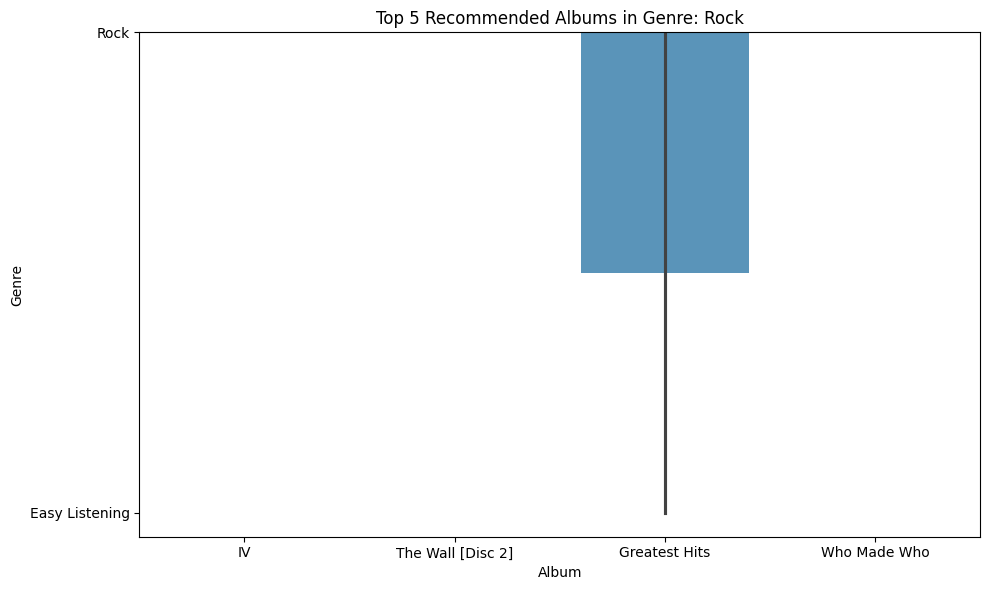

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
tracks_file_path = 'tracks.csv'
df_tracks = pd.read_csv(tracks_file_path)

# Correct column names
columns = ['track_name', 'artist', 'album', 'duration', 'score', 'track_id', 'genre']
df_tracks.columns = columns

# Function to suggest tracks based on genre
def suggest_tracks(df_tracks, genre=None, n=5):
    if genre:
        recommended_tracks = df_tracks[df_tracks['genre'] == genre]
    else:
        recommended_tracks = df_tracks

    return recommended_tracks[['track_name', 'artist', 'genre', 'score']].sort_values(by='score', ascending=False).head(n)

# Function to suggest albums based on genre
def suggest_albums(df_tracks, genre=None, n=5):
    albums = df_tracks[df_tracks['genre'] == genre]['album'].unique() if genre else df_tracks['album'].unique()
    recommended_albums = df_tracks[df_tracks['album'].isin(albums)]
    return recommended_albums[['album', 'artist', 'genre']].drop_duplicates().head(n)

# Function to plot genre distribution as a pie chart
def plot_genre_pie_chart(df_tracks):
    genre_counts = df_tracks['genre'].value_counts()
    plt.figure(figsize=(8, 8))  # Medium size pie chart
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(genre_counts)))
    plt.title("Genre Distribution in Tracks")
    plt.ylabel('')
    plt.show()

# Function to plot genre distribution as a bar chart
def plot_genre_bar_chart(df_tracks):
    genre_counts = df_tracks['genre'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Set3")
    plt.title("Genre Distribution in Tracks")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot a correlation heatmap
def plot_heatmap(df_tracks):
    df_tracks['genre_code'] = df_tracks['genre'].astype('category').cat.codes
    corr_matrix = df_tracks[['score', 'genre_code']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap between Track Score and Genre")
    plt.show()

# Function to plot top recommended tracks
def plot_top_tracks(df_tracks, genre=None, n=5):
    recommended_tracks = suggest_tracks(df_tracks, genre, n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='score', y='track_name', data=recommended_tracks, palette='coolwarm')
    plt.title(f'Top {n} Recommended Tracks in Genre: {genre}' if genre else f'Top {n} Recommended Tracks')
    plt.xlabel('Score')
    plt.ylabel('Track Name')
    plt.tight_layout()
    plt.show()

# Function to plot top recommended albums
def plot_top_albums(df_tracks, genre=None, n=5):
    recommended_albums = suggest_albums(df_tracks, genre, n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='album', y='genre', data=recommended_albums, palette='Blues')
    plt.title(f'Top {n} Recommended Albums in Genre: {genre}' if genre else f'Top {n} Recommended Albums')
    plt.xlabel('Album')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()

# Example usage

# Plot genre distribution
plot_genre_pie_chart(df_tracks)
plot_genre_bar_chart(df_tracks)

# Plot heatmap of correlations
plot_heatmap(df_tracks)

# Plot top recommended tracks
plot_top_tracks(df_tracks, genre='Rock', n=5)

# Plot top recommended albums
plot_top_albums(df_tracks, genre='Rock', n=5)
